In [1]:
import os
import pandas as pd
import numpy as np
import sys
from pathlib import Path

In [2]:
from split_start import *
from split_block import *
from prepare_dataset import *

In [3]:
working_dir = Path(os.getcwd()).parent

In [4]:
sys.path.append(os.path.join(working_dir, 'Preprocessing\\'))

In [5]:
data_path = os.path.join(working_dir.parent, 'Dane\\')

# --------------

In [6]:
all_seasons = pd.read_csv(os.path.join(data_path, 'all_seasons_3.csv'), index_col=0) #'all_seasons_5.csv'

In [7]:
all_seasons['match_date'] = pd.to_datetime(all_seasons['match_date'])

In [8]:
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2268
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   match_id                      2269 non-null   int64         
 1   home_team_id                  2269 non-null   int64         
 2   away_team_id                  2269 non-null   int64         
 3   home_team_name                2269 non-null   object        
 4   away_team_name                2269 non-null   object        
 5   match_date                    2269 non-null   datetime64[ns]
 6   match_result                  2269 non-null   int64         
 7   home_team_score               2269 non-null   float64       
 8   away_team_score               2269 non-null   float64       
 9   home_team_seasons_played      2269 non-null   int64         
 10  away_team_seasons_played      2269 non-null   int64         
 11  home_team_last_season_points  

In [9]:
all_seasons.describe()

,match_id,home_team_id,away_team_id,match_result,home_team_score,away_team_score,home_team_seasons_played,away_team_seasons_played,home_team_last_season_points,away_team_last_season_points,...,home_avg_shots,away_avg_shots,home_won_games,away_won_games,home_tied_games,away_tied_games,home_lost_games,away_lost_games,home_scored_goals,away_scored_goals
count,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.00000,2269.000000,2269.000000,...,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000
mean,3629.479506,4144.372851,4144.682239,1.033495,51.565297,51.546853,3.372851,3.37197,47.483914,47.509476,...,5.617506,5.816875,1.073601,1.154694,0.771265,0.769502,1.147201,1.069193,4.005729,4.180256
std,658.387855,1326.480329,1328.487674,0.741041,5.123285,5.114102,2.038493,2.03649,24.413840,24.403763,...,2.404072,2.429016,0.863912,0.890054,0.757760,0.739551,0.875604,0.857619,2.277771,2.326262
min,2489.000000,3457.000000,3457.000000,0.000000,40.750000,40.750000,0.000000,0.00000,0.000000,0.000000,...,0.670000,0.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3060.000000,3461.000000,3461.000000,0.000000,48.500000,48.500000,2.000000,2.00000,39.000000,39.000000,...,3.670000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,3629.000000,3467.000000,3467.000000,1.000000,50.880000,50.880000,3.000000,3.00000,47.000000,47.000000,...,5.330000,5.330000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000
75%,4199.000000,3475.000000,3475.000000,2.000000,54.380000,54.380000,5.000000,5.00000,64.000000,64.000000,...,7.000000,7.330000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,5.000000,6.000000
max,4768.000000,8784.000000,8784.000000,2.000000,70.000000,70.000000,7.000000,7.00000,89.000000,89.000000,...,15.000000,17.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,16.000000


In [10]:
get_direct_matches_by_id(2489, data_path, 3)

,home_team_id,away_team_id,home_team_name,away_team_name,match_date,match_result
0,3465,3463,Aston Villa,West Ham United,2010-01-17,0
1,3463,3465,West Ham United,Aston Villa,2009-11-04,1
2,3465,3463,Aston Villa,West Ham United,2009-04-18,0
3,3463,3465,West Ham United,Aston Villa,2008-12-20,2


In [11]:
list_of_parameters = ['home_team_score',
                        'away_team_score', 
                        'home_team_seasons_played',
                        'away_team_seasons_played', 
                        'home_team_last_season_points',
                        'away_team_last_season_points', 
                        'home_players_avg_age',
                        'away_players_avg_age', 
                        'home_players_avg_rating',
                        'away_players_avg_rating', 
                        'home_elo_rating', 
                        'away_elo_rating',
                        'avg_home_win_odds', 
                        'avg_draw_odds', 
                        'avg_away_win_odds',
                        'home_avg_corners', 
                        'away_avg_corners', 
                        'home_avg_shots',
                        'away_avg_shots', 
                        'home_won_games', 
                        'away_won_games', 
                        'home_tied_games',
                        'away_tied_games', 
                        'home_lost_games', 
                        'away_lost_games',
                        'home_scored_goals', 
                        'away_scored_goals'
                     ]

In [77]:
dataset = prepare_dataset(all_seasons, list_of_parameters, data_path,
                          add_direct = True, avg = 3, train_size = 0.85, test_size = 0.1,
                          undersample = T, globalCS = True)

In [81]:
Counter(dataset['y_train'])

Counter({1: 872, 0: 872, 2: 872})

In [14]:
dataset['X']

,home_team_score,away_team_score,home_team_seasons_played,away_team_seasons_played,home_team_last_season_points,away_team_last_season_points,home_players_avg_age,away_players_avg_age,home_players_avg_rating,away_players_avg_rating,...,away_won_games,home_tied_games,away_tied_games,home_lost_games,away_lost_games,home_scored_goals,away_scored_goals,home_direct_wins,away_direct_wins,direct_draws
0,55.50,46.12,2,2,64,35,28.09,27.55,79.27,73.73,...,1,0,1,2,1,2,6,1,1,2
2,56.25,54.38,2,2,39,46,27.73,29.45,73.55,75.45,...,1,1,0,1,2,4,3,0,2,2
3,56.38,63.75,2,1,86,0,29.36,25.73,83.91,70.45,...,1,0,1,0,1,17,3,2,0,0
7,50.62,40.75,2,2,63,75,27.55,25.64,82.45,79.55,...,1,1,1,1,1,4,5,0,2,2
4,58.12,70.00,2,1,44,50,24.82,27.73,74.82,76.82,...,1,0,0,2,2,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,47.88,57.25,3,1,60,41,27.27,27.55,77.00,73.55,...,1,0,1,1,1,8,6,1,1,0
1978,41.50,48.50,4,7,56,54,27.27,27.00,76.27,76.73,...,2,2,1,1,0,3,5,3,3,2
1974,50.62,48.62,7,7,64,62,24.91,25.27,79.18,79.18,...,1,1,2,0,0,7,5,6,7,1
1975,48.62,44.25,0,7,0,75,27.36,27.55,73.09,82.18,...,2,1,0,1,1,3,8,0,0,1


In [82]:
X_train = dataset['X_train']
y_train = dataset['y_train']
#train_id = dataset['match_id'][:len(dataset['match_id']) * 85 // 100] 

X_valid = dataset['X_valid']
y_valid = dataset['y_valid']

X_test = dataset['X_test']
y_test = dataset['y_test']

## Sieć

In [83]:
train_stats = X_train.describe()
train_stats

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.00000,2616.000000,...,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000
mean,52.340784,52.260914,2.891437,2.964067,46.140673,48.518349,27.335593,27.307672,75.83732,76.194090,...,1.175076,0.771407,0.763761,1.171254,1.054664,3.965596,4.244648,1.628440,1.764908,1.388761
std,5.299323,5.255880,1.711190,1.674990,24.053718,24.235690,1.518942,1.481347,3.55875,3.712659,...,0.899079,0.757197,0.745671,0.862935,0.851763,2.211815,2.388582,1.778439,1.827600,1.239816
min,40.750000,40.750000,0.000000,0.000000,0.000000,0.000000,23.450000,23.450000,66.73000,67.180000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.750000,48.750000,2.000000,2.000000,39.000000,40.000000,26.270000,26.270000,73.18000,73.270000,...,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,51.880000,51.880000,3.000000,3.000000,47.000000,47.000000,27.360000,27.270000,75.09000,75.450000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000
75%,55.500000,55.500000,4.000000,4.000000,63.250000,67.000000,28.360000,28.270000,78.55000,79.572500,...,2.000000,1.000000,1.000000,2.000000,2.000000,5.000000,6.000000,2.000000,3.000000,2.000000
max,70.000000,70.000000,7.000000,7.000000,89.000000,89.000000,32.090000,32.180000,84.45000,84.090000,...,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,16.000000,10.000000,10.000000,7.000000


In [84]:
np.array(y_test)

array([0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0,
       2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [85]:
def norm(x):
    return np.array((x - train_stats['mean']) / train_stats['std'])

In [86]:
X_train_dense = np.array(X_train)
X_valid_dense = np.array(X_valid)
X_test_dense = np.array(X_test)
X_train_dense[0]

array([5.8750000e+01, 4.6750000e+01, 3.0000000e+00, 0.0000000e+00,
       4.6000000e+01, 0.0000000e+00, 2.8090000e+01, 2.6000000e+01,
       7.4820000e+01, 7.2640000e+01, 1.6475343e+03, 1.6330293e+03,
       2.0900000e+00, 3.2700000e+00, 3.5800000e+00, 3.6700000e+00,
       4.6700000e+00, 4.3300000e+00, 7.3300000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 3.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00])

In [87]:
from tensorflow import keras

In [88]:
import tensorflow as tf

In [89]:
from sklearn.metrics import precision_recall_fscore_support

In [90]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [91]:
tf.keras.backend.clear_session()

In [92]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [93]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [94]:
tf.random.set_seed(42)
model_dense = keras.models.Sequential([
    keras.layers.Dense(40, activation = 'relu', input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    MCDropout(0.3),
    keras.layers.Dense(40, activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(3, activation = 'softmax')
])
model_dense.compile(optimizer='nadam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history_dense = model_dense.fit(X_train_dense, y_train, validation_data=(X_valid_dense, y_valid),
                                epochs = 80, callbacks=[early_stopping_cb], verbose = 0)

y_probas_dense = np.stack([model_dense(X_test_dense) for sample in range(100)])
y_proba_dense = y_probas_dense.mean(axis=0)

result_dense = list()
for i in range(y_proba_dense.shape[0]):
    result_dense.append(np.argmax(y_proba_dense[i]))
accuracy = np.sum(result_dense == y_test) / len(y_test)

print('\n##################################\nAccuracy: ')

print(accuracy)

print('\n##################################\nPrecision, Recall and fscore:: ')

print(precision_recall_fscore_support(y_test, result_dense, average='macro'))


##################################
Accuracy: 
0.44933920704845814

##################################
Precision, Recall and fscore:: 
(0.29558634020618557, 0.40910518053375194, 0.34283841363487383, None)


In [28]:
print(history_dense.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [29]:
## tensorboard --logdir=./my_logs --port=6006

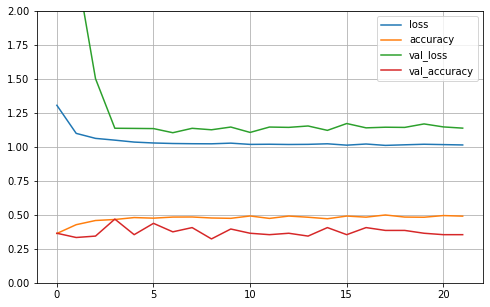

In [30]:
import matplotlib.pyplot as plt
pd.DataFrame(history_dense.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
roc_ovo_macro = roc_auc_score(y_test, y_proba_dense, multi_class="ovo", average="macro")
roc_ovr_macro = roc_auc_score(y_test, y_proba_dense, multi_class="ovr", average="macro")
print(f"OvO: {roc_ovo_macro}\nOvR: {roc_ovr_macro}")

OvO: 0.6542333962521162
OvR: 0.6535489641974713


In [33]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1240      
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
mc_dropout (MCDropout)       (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 205       
_________________________________________________________________
batch_normalization_2 (Batch (None, 5)                 2

In [34]:
sorted(Counter(y_test[result_dense == y_test]).items(), key = lambda el : el[0])

[(0, 20), (1, 37), (2, 40)]

In [35]:
sorted(Counter(y_test[result_dense != y_test]).items(), key = lambda el : el[0])

[(0, 45), (1, 22), (2, 27)]

In [36]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
x_arr = np.array(dataset['X'][['home_elo_rating', 'away_elo_rating']])

In [38]:
def draw2DELO(dataset, labels, loc_str = 'upper right', palette = 'deep'): 
    warnings.simplefilter("ignore")
    
    plt.figure(figsize = (11,11))
    ax = sns.scatterplot(dataset[:, 0], dataset[:, 1], palette = palette, hue = labels, c = labels)
    plt.title("ELO Rationg")
    plt.xlabel("home_elo_rating")
    plt.ylabel("away_elo_rating")  
    plt.legend(loc = loc_str)

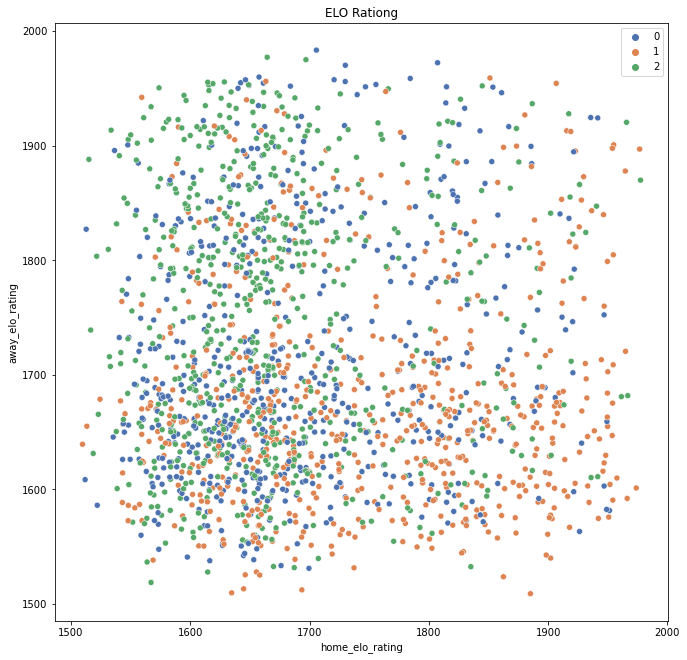

In [39]:
draw2DELO(x_arr, labels=dataset['y'])

## Sieć w blokach

In [40]:
import sklearn as sk
from sklearn import metrics

In [41]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [42]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

In [43]:
blocking = StartSplit(n_blocks = 8, train_split = 200, scoring = metrics.accuracy_score)

In [44]:
tf.random.set_seed(42)
model_dense_blocks = keras.models.Sequential([
    keras.layers.Dense(40, activation = 'relu', input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    MCDropout(0.3),
    keras.layers.Dense(40, activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation = 'selu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(3, activation = 'softmax')
])
model_dense_blocks.compile(optimizer='nadam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')


In [45]:
X_dataset_blocks = np.array(dataset['X'])
y_dataset_blocks = np.array(dataset['y'])
global_accuracy = list()
for train_ind, test_ind in blocking.generate_cv(X_dataset_blocks, y_dataset_blocks):
    tf.random.set_seed(42)
    model_dense_blocks.compile(optimizer='nadam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    history_dense = model_dense_blocks.fit(X_dataset_blocks[train_ind][:len(train_ind)*90//100], 
                                           y_dataset_blocks[train_ind][:len(train_ind)*90//100], 
                                           validation_data=(X_dataset_blocks[train_ind][len(train_ind)*90//100:], 
                                                            y_dataset_blocks[train_ind][len(train_ind)*90//100:]),
                                            epochs = 80, callbacks=[early_stopping_cb], verbose = 0)
    y_probas_dense = np.stack([model_dense_blocks(X_dataset_blocks[test_ind]) for sample in range(100)])
    y_proba_dense = y_probas_dense.mean(axis=0)

    result_dense = list()
    for i in range(y_proba_dense.shape[0]):
        result_dense.append(np.argmax(y_proba_dense[i]))
    global_accuracy.append(result_dense == y_dataset_blocks[test_ind])
    accuracy = np.sum(result_dense == y_dataset_blocks[test_ind]) / len(y_dataset_blocks[test_ind])
    print('\n##################################\nAccuracy: ')

    print(accuracy)

    print('\n##################################\nPrecision, Recall and fscore: ')

    print(precision_recall_fscore_support(y_dataset_blocks[test_ind], result_dense, average='macro'))
    
print(f"\n\n##################################")
print(f"Global Accuracy: {np.sum(np.concatenate(np.array(global_accuracy)))/len(np.concatenate(np.array(global_accuracy)))}")




##################################
Accuracy: 
0.375

##################################
Precision, Recall and fscore: 
(0.3031746031746032, 0.38447220993660625, 0.3040325261997701, None)

##################################
Accuracy: 
0.405

##################################
Precision, Recall and fscore: 
(0.4262992250741797, 0.40632531148660184, 0.4099543125138096, None)

##################################
Accuracy: 
0.51

##################################
Precision, Recall and fscore: 
(0.5315974537393218, 0.5059342610712473, 0.5003116046594308, None)

##################################
Accuracy: 
0.495

##################################
Precision, Recall and fscore: 
(0.5013712573480638, 0.4950980392156863, 0.4974113807554115, None)

##################################
Accuracy: 
0.51

##################################
Precision, Recall and fscore: 
(0.5593434343434343, 0.5218627450980392, 0.5084241220924971, None)

##################################
Accuracy: 
0.515

###########

## SVM 

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats
import sklearn as sk
from sklearn import metrics

from sklearn.svm import SVC

In [48]:
sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [49]:
fromStart = StartSplit(n_blocks = 8, train_split = 200, scoring = metrics.accuracy_score)

In [50]:
blocking = BlockingSplit(n_blocks = 3, train_split = 0.9, scoring = metrics.accuracy_score)

=============== Pipeline - SVM ===============

In [51]:
parameters = {'C':[1,2],'gamma':[0.095,0.001,0.0015], 'kernel':['rbf','linear']}

parameters = {'C': stats.uniform(1, 5),
              'gamma': stats.uniform(0.001, 0.05),
              'kernel':['rbf','linear']}

In [52]:
datasetSVM = prepare_dataset(all_seasons, list_of_parameters, data_path,
                          add_direct = True, avg = 3, train_size = 0.9, test_size = 0.1,
                          undersample = True, globalCS = False)

Xtrain90 = datasetSVM['X_train']

scaler = StandardScaler()
scaler.fit(Xtrain90)
#import pickle
#ex_filename = 'SVM_scaler.pkl'
#with open(ex_filename, "wb") as f:
#    pickle.dump(scaler, f)

#Xtransformed = scaler.transform(datasetSVM['X'])

Xtrain = scaler.transform(datasetSVM['X_train'])
Ytrain = datasetSVM['y_train']

Xtest = scaler.transform(datasetSVM['X_test'])
Ytest = datasetSVM['y_test']

In [53]:
clf_fromStart_grid = RandomizedSearchCV(SVC(), \
                   param_distributions = parameters,\
                   scoring = 'f1_macro', \
                   cv = fromStart.generate_cv(Xtrain, Ytrain), \
                   n_jobs=-1, \
                   n_iter = 50, \
                   random_state = 44)

In [54]:
clf_fromStart_grid.fit(Xtrain, Ytrain)

RandomizedSearchCV(cv=<generator object StartSplit.generate_cv at 0x0000016EE720C448>,
                   estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016EE761F8C8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016EE7614048>,
                                        'kernel': ['rbf', 'linear']},
                   random_state=44, scoring='f1_macro')

In [55]:
print(clf_fromStart_grid.best_params_)

{'C': 3.560291686892903, 'gamma': 0.0030492848805430566, 'kernel': 'rbf'}


In [61]:
from_start_predicted = clf_fromStart_grid.predict(Xtest)

print('\n##################################\nAccuracy: ')

print(metrics.accuracy_score(Ytest, from_start_predicted))

print('\n##################################\nPrecision, Recall and fscore:: ')

print(precision_recall_fscore_support(Ytest, from_start_predicted, average='macro'))


##################################
Accuracy: 
0.4973821989528796

##################################
Precision, Recall and fscore:: 
(0.4878759021143429, 0.49900302918263967, 0.48447554857479896, None)


In [62]:
best = clf_fromStart_grid.best_estimator_
best.set_params(probability=True)

SVC(C=3.560291686892903, gamma=0.0030492848805430566, probability=True)

In [63]:
from sklearn.model_selection import cross_val_predict
y_probas_svm = cross_val_predict(best, Xtest, Ytest, \
                                 cv=3, method="predict_proba")

In [64]:
roc_ovo_macro = roc_auc_score(y_test, y_probas_svm, multi_class="ovo", average="macro")
roc_ovr_macro = roc_auc_score(y_test, y_probas_svm, multi_class="ovr", average="macro")
print(f"OvO: {roc_ovo_macro}\nOvR: {roc_ovr_macro}")

OvO: 0.6414699643892662
OvR: 0.6367455367067748


In [66]:
sorted(Counter(y_test[from_start_predicted == Ytest]).items(), key = lambda el : el[0])

[(0, 18), (1, 35), (2, 42)]

In [67]:
sorted(Counter(y_test[from_start_predicted != Ytest]).items(), key = lambda el : el[0])

[(0, 47), (1, 24), (2, 25)]

In [63]:
import pickle
ex_filename = 'SVM.pkl'
with open(ex_filename, "wb") as f:
    pickle.dump(clf_fromStart_grid.best_estimator_, f)


## Shap Values SVM

In [247]:
import shap
shap.initjs()

In [374]:
X_train_shap = np.array(Xtrain)[:600]
X_test_shap = np.array(Ytrain)[:600]

In [375]:
X_train_shap_summary = shap.sample(X_train_shap, 25)
explainer = shap.KernelExplainer(clf_fromStart_grid.predict, X_train_shap_summary)
shap_values = explainer.shap_values(X_train_shap)
expected_values = explainer.expected_value

In [376]:
import pickle

In [377]:
ex_filename = 'shap_values_svm.pkl'
with open(ex_filename, "wb") as f:
    pickle.dump(shap_values, f)
    
ex_filename = 'expected_values_svm.pkl'
with open(ex_filename, "wb") as f:
    pickle.dump(expected_values, f)

In [378]:
ex_filename = 'shap_values_svm.pkl'
with open(ex_filename, 'rb') as f:
    shap_values = pickle.load(f)

ex_filename = 'expected_values_svm.pkl'
with open(ex_filename, 'rb') as f:
    expected_values = pickle.load(f)

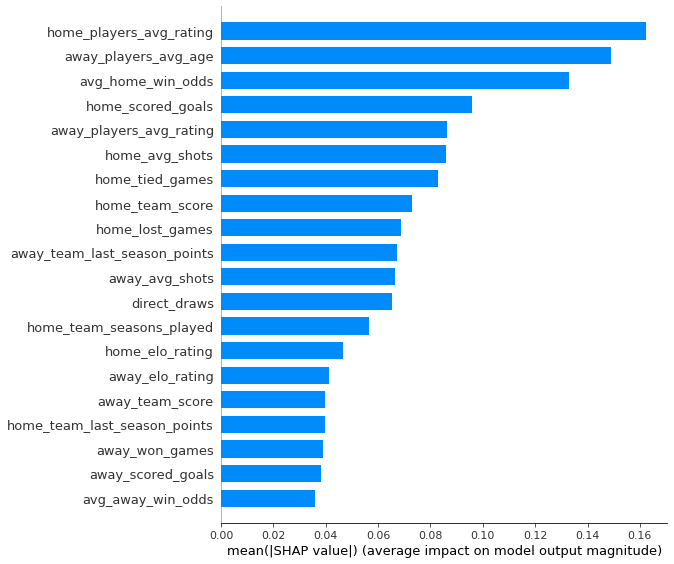

In [382]:
shap.summary_plot(shap_values, datasetSVM['X'][:600], plot_type="bar")

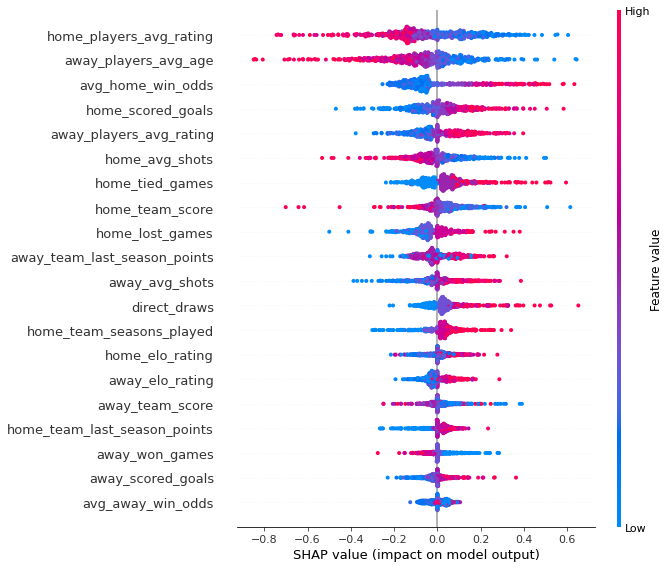

In [385]:
shap.summary_plot(shap_values, X_train[:600])

## Shap Values DNN

In [35]:
import shap
shap.initjs()

In [36]:
X_train_shap = np.array(X_train)
X_test_shap = np.array(X_test)

In [ ]:
X_train_shap_summary = shap.sample(X_train_shap, 100)
explainer = shap.KernelExplainer(model_dense.predict, X_train_shap_summary)
shap_values = explainer.shap_values(X_train_shap)

In [37]:
import pickle

In [ ]:
ex_filename = 'explainer_2.pkl'
with open(ex_filename, "wb") as f:
    pickle.dump(shap_values, f)

In [275]:
ex_filename = 'explainer_2.pkl'
with open(ex_filename, 'rb') as f:
    explainer = pickle.load(f)

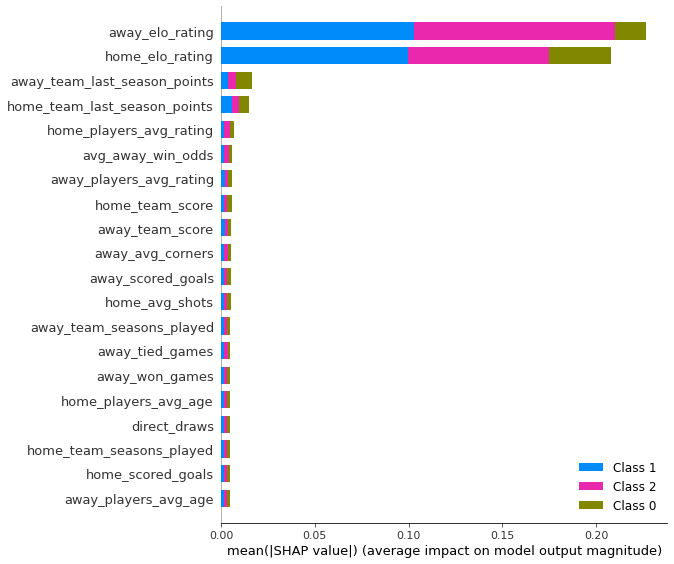

In [39]:
shap.summary_plot(explainer, X_train, plot_type="bar")

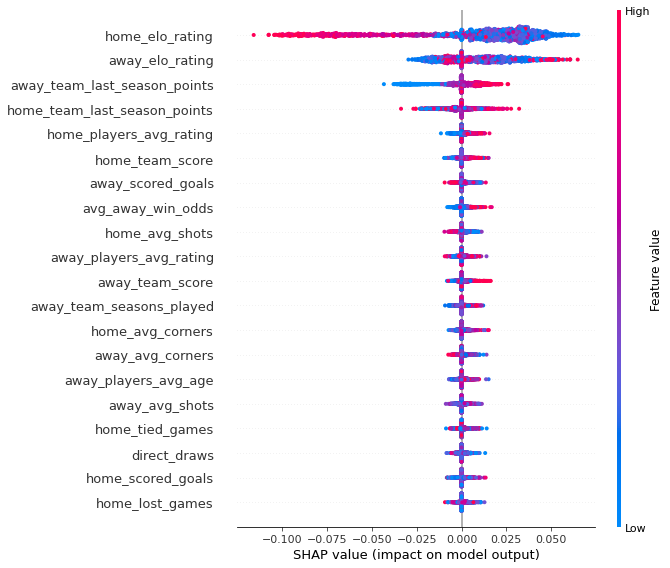

In [286]:
shap.summary_plot(explainer[0], X_train)

In [ ]:
INSTANCE_NUM = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][INSTANCE_NUM], X_train.iloc[INSTANCE_NUM,:])

In [ ]:
NUM_ROWS = 10
shap.force_plot(explainer.expected_value[0], shap_values[0][0:NUM_ROWS], X_train.iloc[0:NUM_ROWS])

## Wizualizacja 

In [68]:
dataset_hot = pd.get_dummies(dataset['X'])

In [69]:
def draw2D(dataset, labels, loc_str = 'upper right', palette = 'deep', figsize = (13,13)): 
    warnings.simplefilter("ignore")
    
    plt.figure(figsize = figsize)
    ax = sns.scatterplot(dataset[:, 0], dataset[:, 1], palette = palette, hue = labels, c = labels)
    plt.title("2D decomposition")
    plt.xlabel("Z1")
    plt.ylabel("Z2")  
    plt.legend(loc = loc_str)

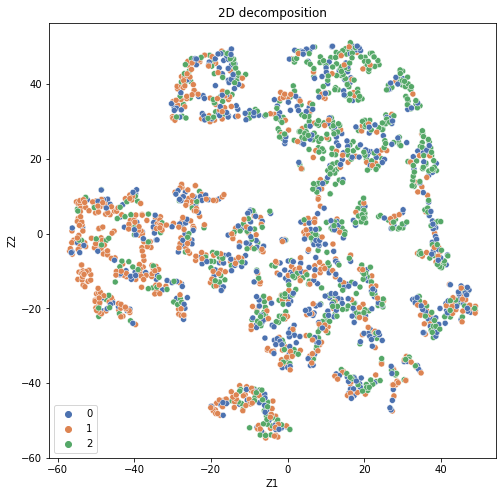

In [70]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2)
tsne2_data_all = tsne2.fit_transform(dataset_hot)
draw2D(tsne2_data_all, dataset['y'], loc_str = 'lower left', figsize = (8,8))

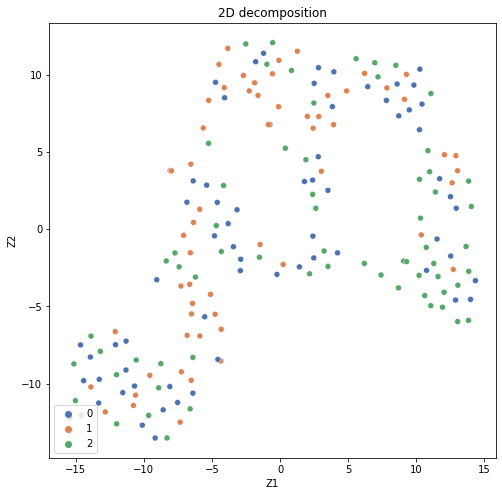

In [71]:
tsne2 = TSNE(n_components=2)
tsne2_data_dense = tsne2.fit_transform(X_test_dense)
draw2D(tsne2_data_dense, y_test, loc_str = 'lower left', figsize = (8,8))

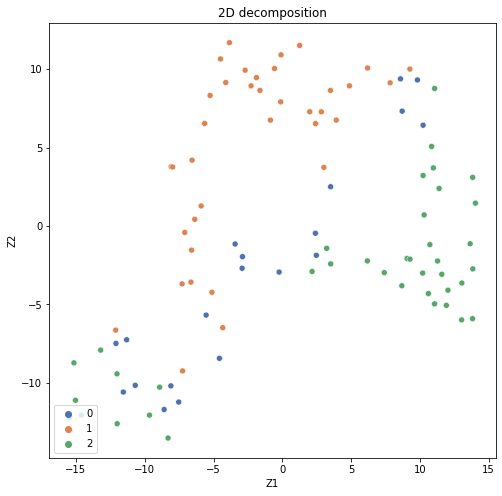

In [74]:
tsne2 = TSNE(n_components=2)
#tsne2_data = tsne2.fit_transform(tsne2_data_dense[result_dense == y_test])
draw2D(tsne2_data_dense[result_dense == y_test], y_test[result_dense == y_test], loc_str = 'lower left', figsize = (8,8))

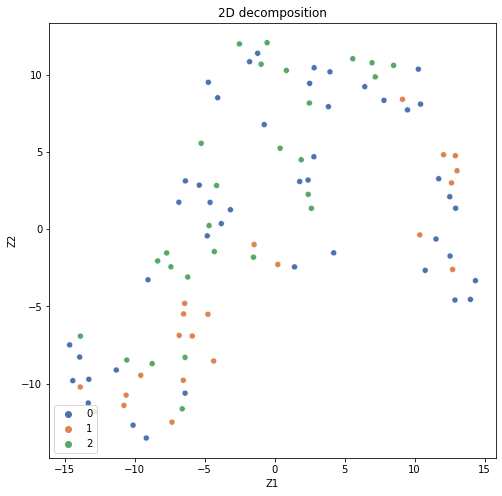

In [75]:
tsne2 = TSNE(n_components=2)
#tsne2_data = tsne2.fit_transform(X_test_dense[result_dense != y_test])
draw2D(tsne2_data_dense[result_dense != y_test], y_test[result_dense != y_test], loc_str = 'lower left', figsize = (8,8))

<AxesSubplot:>

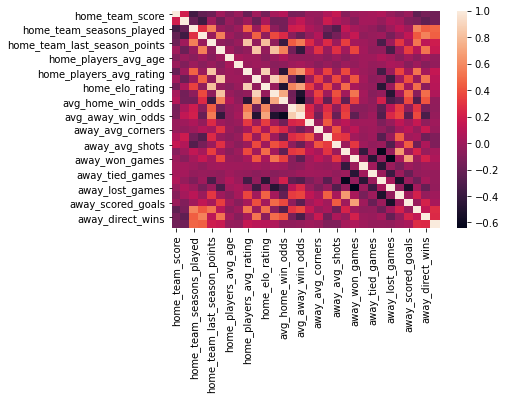

In [76]:
corr = dataset['X'].corr()
sns.heatmap(corr)

## Przykład użycia

In [10]:
from data_aggregator import *
from season import *
from parameters import *
from team import *

In [ ]:
data_aggregator = DataAggregator()
data_for_seasons, data_for_seasons_past =\
                    data_aggregator.get_data_for_seasons([Season.y2011, Season.y2012], 
                                                         Parameters(no_last_matches=3))
data_arsenal, data_arsenal_past = data_aggregator.get_data_for_team_in_seasons(Team.Arsenal, 
                                                                               [Season.y2011, Season.y2012],
                                                                             Parameters(no_last_matches=3))

In [11]:
no_last_matches = 3

data_aggregator = DataAggregator()
all_data, all_data_past =\
                    data_aggregator.get_data_for_seasons([Season.y2010, Season.y2011,
                                                         Season.y2012, Season.y2013,
                                                         Season.y2014, Season.y2015, Season.y2016], 
                                                         Parameters(no_last_matches=no_last_matches))

In [12]:
all_data.to_csv(os.path.join(data_path, f'all_seasons_{no_last_matches}.csv'))

In [13]:
for key in all_data_past.keys():
    all_data_past[key].to_csv(os.path.join(data_path, f'{key}_{no_last_matches}.csv'))

In [ ]:
data_arsenal

In [ ]:
data_for_seasons.columns

In [ ]:
data_arsenal.columns

In [ ]:
data_arsenal.info()

In [ ]:
data_arsenal_past

In [ ]:
data_for_seasons_past

In [ ]:
from split_start import *
from split_block import *
from prepare_dataset import *
import sklearn as sk
from sklearn import metrics

blocking = StartSplit(n_blocks = 3, train_split = 0.7, scoring = metrics.accuracy_score)

blocking._compute_param_dict(9, ceil = False)
print(blocking.param_info_)
for train_ind, test_ind in blocking.generate_cv([1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9]):
    print(train_ind, test_ind)